In [3]:
from tensorflow.keras.applications import ResNet50V2
import tensorflow 
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import numpy as np
from numpy import linalg as LA
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import os
import h5py
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
import matplotlib.image as mpimg
from scipy import spatial

In [5]:
input_shape = (224, 224, 3)
model = ResNet50V2(weights='imagenet', input_shape=(input_shape[0], input_shape[1], input_shape[2]), pooling='max', include_top=False)

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [ ]:
model.predict(np.zeros((1, 224, 224, 3)))

In [7]:
def resnet50v2_extract_feature(image_path):
    img = image.load_img(image_path, target_size=(input_shape[0], input_shape[1]))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    norm_features = features[0]/LA.norm(features[0])
    return norm_features

In [8]:
path = "/Users/sudipkhadka/Desktop/Computer-Vision2/Embedding_imges"

In [9]:
image_path = path + "/"

features = []
names = []
for img in os.listdir(image_path):
    if img==".DS_Store":
        continue
    X = resnet50v2_extract_feature(image_path+img)
    features.append(X)
    names.append(img)
features = np.array(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━

In [10]:
output = "RESNET50V2Features.h5"
h5f = h5py.File(output, "w")
h5f.create_dataset('dataset_1', data=features)
h5f.create_dataset('dataset_2', data=np.string_(names))
h5f.close()

In [11]:
h5f = h5py.File("RESNET50V2Features.h5", "r")
features = h5f['dataset_1'][:]
image_name = h5f['dataset_2'][:]
h5f.close()

In [12]:
def reterive_similar_image(query_image_path):
    plt.imshow(io.imread(query_image_path))
    plt.title("Query Image")
    plt.show()  

    print("Reteriving Images.........")  
    X = resnet50v2_extract_feature(query_image_path)

    scores = []
    for i in range(features.shape[0]):
        score  = 1 - spatial.distance.cosine(X, features[i])
        scores.append(score)
    scores = np.array(scores)
    rank_id = np.argsort(scores)[::-1]
    rank_score = scores[rank_id]

    n = 10
    lists = [os.path.join(path, image_name[index].decode('utf-8')) if isinstance(image_name[index], bytes) else os.path.join(path, image_name[index]) 
         for i, index in enumerate(rank_id[0:n])]

    num_images = len(lists)
    fig, axes = plt.subplots(1, num_images, figsize=(17, 7))
    for i, image_path in enumerate(lists):
        if os.path.exists(image_path):
            img = mpimg.imread(image_path)  
            axes[i].imshow(img)  
            axes[i].axis('off')  
            axes[i].set_title(f"Image Rank {i+1}")
        else:
            print(f"File not found: {image_path}") 
    plt.show()

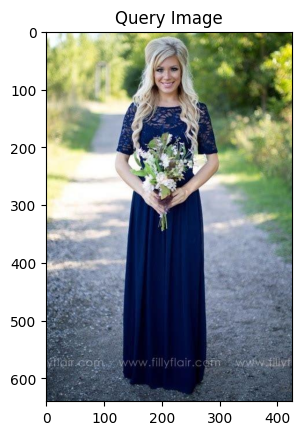

Reteriving Images.........
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


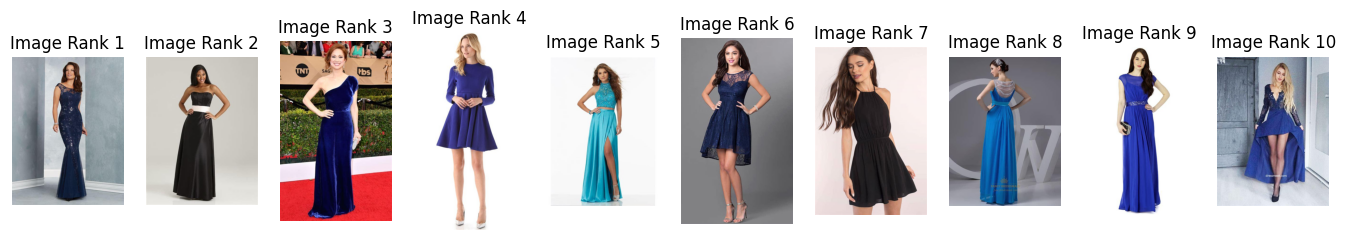

In [13]:
reterive_similar_image("/Users/sudipkhadka/Desktop/Computer-Vision2/query_image/fa3b752a3b52957ec859b26b5dbf7457e8af2513.jpg")

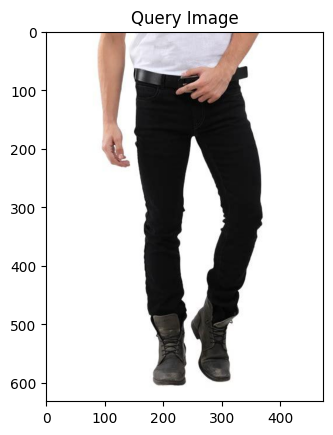

Reteriving Images.........
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


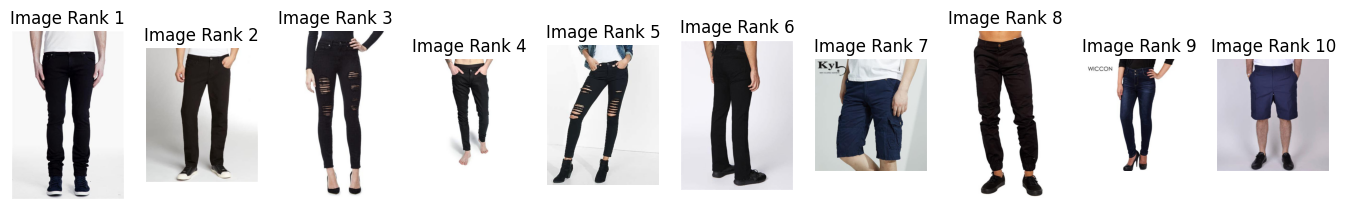

In [14]:
reterive_similar_image('/Users/sudipkhadka/Desktop/Computer-Vision2/query_image/fa60dbf6735fbf1b90977e531d4a4023fc5ec34b.jpg')